In [ ]:
# Importing Librarie
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow import keras
from keras import layers, models
from keras.layers import Dense,Dropout,BatchNormalization, ReLU,Softmax
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

## Abstract

In this notebook we are going to perform digits recognition on (0-9 digit) Typeface-based digit dataset by using a simple CNN network with a 2 layer CNN with the help of TensorFlow library.

Then we will also validate the model accuracy using evaluation scheme and test the model on real world sample image of digit and verify the accuracy

In [ ]:
# Loading the csv dataset from Google Drive
filePath = '/content/drive/MyDrive/Colab Notebooks/TMNIST_Data.csv'
dataSet = pd.read_csv(filePath)

#Converting to List format
dataList = dataSet.values.tolist()

data = []
x = []
y = []
train_data = []
train_label = []
test_data = []
test_label = []

In [ ]:
dataSet['names'].value_counts()

GrandHotel-Regular          10
Laila-Regular               10
Tajawal-Medium              10
Numans-Regular              10
PT_Sans-Web-Italic          10
                            ..
Thasadith-Bold              10
CherryBomb-Regular          10
NotoSansOriyaUI-Thin        10
Kodchasan-SemiBoldItalic    10
AveriaSerifLibre-Ligh       10
Name: names, Length: 2990, dtype: int64

## Reshaping - Splitting Data

Splitting dataset into train, test

In [ ]:
x = []
y = []

#Reshaping data
for i in range(len(dataList)):
    label = dataList[i][1]
    a = dataList[i][2:]
    a = np.array(a)
    a = a.reshape(28, 28).tolist()
    x.append(a)
    y.append(label)

#Splitting dataset into train, test
train_data, test_data, train_label, test_label = train_test_split(x, y, test_size=0.25, random_state=1)

In [ ]:
# the length of train and test data
print(len(train_data))
print(len(test_data))

22425
7475


### Sample Image Plot

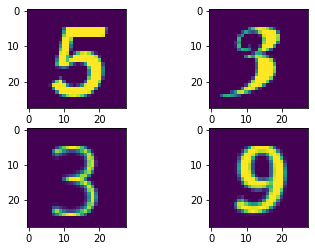

In [ ]:
# plotting sample 4 images
plt.subplot(221)
plt.imshow(train_data[0])
plt.subplot(222)
plt.imshow(train_data[1])
plt.subplot(223)
plt.imshow(train_data[2])
plt.subplot(224)
plt.imshow(train_data[3])

# show the plot
plt.show()

In [ ]:
# Convert the list for data preprocessing
train_data = np.array(train_data)
test_data = np.array(test_data)
train_label = np.array(train_label)
test_label = np.array(test_label)

### Normalizing Data

Reshaping the train, test data and converting it in 32-bit precision float format to train a neural network

We are also scaling the features in 0.0 - 1.0 by dividing it by 255 (Max. value of a byte) so that neural network works well with default learning rate with minimal loss




In [ ]:
#Reshaping the train, test data and converting it in standardized float format 
train_data = train_data.reshape((22425, 28, 28, 1))
train_data = train_data.astype('float32') / 255

test_data = test_data.reshape((7475, 28, 28, 1))
test_data = test_data.astype('float32') / 255

# Convert class vector to a binary class
train_label = to_categorical(train_label)
test_label = to_categorical(test_label)

## Build Model

Let's build Sequential CNN model with 2 layer filters with pool size of 3 * 3 for a pooling operation that calculates the maximum, or largest, value in each patch of each feature map with 1 input 1 output network layer

Activation function as **ReLU** which is a non-linear activation function that performs on multi-layer neural networks for better computation performance on 28 * 28 shape input frame

We are using **Softmax** function in last output layer to turn a vector of a real values into probability distribution

In [ ]:
# Using Sequential model
model = models.Sequential()

#1st Layer with kernel size 3*3 with pool size of 2*2 and ReLU as activation function for 28*28 shape input img
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

#2n Layer with kernel size 3*3 with pool size of 2*2 and ReLu as activation function for 28*28 shape input img
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

#Flattening the inputs
model.add(layers.Flatten())

#Densely connected NN
model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_63 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_64 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_19 (Flatten)        (None, 1600)              0         
                                                                 
 dense_32 (Dense)            (None, 64)              

# Training the model

We will be using rmsprop optimizer with categorical_crossentropy loss function and will be using Accuracy for performance metrics

We are using 20% validation split and 5 Epochs with 64 batch size input 

As the number of epochs increases, more number of times the weight are changed in the neural network

At each iteration, we can see that Accuracy is increasing and loss is decreasing in both training and validation


In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_data, train_label, validation_split=0.20,epochs=5, batch_size=64)

Epoch 1/5
281/281 [==============================] - 18s 60ms/step - loss: 0.0217 - accuracy: 0.9936 - val_loss: 0.0496 - val_accuracy: 0.9871
Epoch 2/5
281/281 [==============================] - 17s 60ms/step - loss: 0.0166 - accuracy: 0.9949 - val_loss: 0.0581 - val_accuracy: 0.9862
Epoch 3/5
281/281 [==============================] - 17s 60ms/step - loss: 0.0126 - accuracy: 0.9963 - val_loss: 0.0541 - val_accuracy: 0.9891
Epoch 4/5
281/281 [==============================] - 17s 60ms/step - loss: 0.0112 - accuracy: 0.9972 - val_loss: 0.0559 - val_accuracy: 0.9889
Epoch 5/5
281/281 [==============================] - 17s 60ms/step - loss: 0.0093 - accuracy: 0.9975 - val_loss: 0.0536 - val_accuracy: 0.9906


# Visualizing the Model

In [ ]:
#Visualize the model evaluation scheme
def my_plot(history):
  fig, ax1 = plt.subplots()
  ax2 = ax1.twinx()
    
  ax1.plot(history.history['accuracy'], label='Training Accuracy', color='green')
  ax1.plot(history.history['val_accuracy'], label='Validation Accuracy', color='blue')
    
  ax2.plot(history.history['loss'], label = 'Training Loss', color='orange')
  ax2.plot(history.history['val_loss'], label = 'Validation Loss', color='red')
  
  ax1.set_xlabel('Epochs')
  ax1.set_ylabel('Accuracy', color='g')
  ax2.set_ylabel('Loss', color='b')
    
  ax1.legend(loc=1)  
  ax2.legend(loc=3)
  # plt.ylim([0.6, 2.5])
  plt.title('Training-Validation Loss and Accuracy')
  plt.show()

# Model Performance Visualization


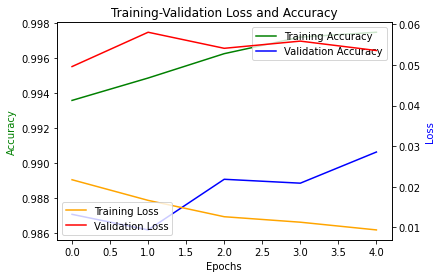

In [ ]:
my_plot(history)

# Evaluating Model Accuracy on Test Data

Let's evaluate the model on test data set and find out how model is working.

We can see below, We are getting model accuracy of 99.10% which is preety good for 2 layer CNN

In [ ]:
test_loss, test_acc = model.evaluate(test_data, test_label)
print("Model Accuracy Results: ", test_acc)

234/234 [==============================] - 2s 9ms/step - loss: 0.0464 - accuracy: 0.9910
Model Accuracy Results:  0.9910367727279663


In [ ]:
# Prediction on test data to calculate the confusion metrix
pred=model.predict(test_data)

y_pred=[]
y_true=[]
for i in pred:
  y_pred+=[np.argmax(i)]
for i in test_label:
  y_true+=[np.argmax(i)]

PRED=np.array(y_pred)
ANS=np.array(y_true)
print(PRED[0:10])
print(ANS[0:10])

[7 9 7 7 7 5 8 8 5 0]
[7 9 7 7 7 5 8 8 5 0]


# Confusion Metrix

Let's create a confusion metrix for test data evaluation

We can see below, numbers of counts on diagonal are the correctly identified digits from test data

Whereas all other count of numbers are wrongly identified

In this case the model is pretty accurate and hence there are very less number of miss identified digits can be seen

In [ ]:
df = pd.DataFrame(confusion_matrix(y_true, y_pred, labels=np.arange(0,10)))
print('Accuracy : ',accuracy_score(y_true,y_pred))
df

Accuracy :  0.9910367892976588


,0,1,2,3,4,5,6,7,8,9
0,726,0,2,0,0,0,2,0,0,0
1,0,743,1,0,2,0,0,10,0,0
2,0,1,742,1,0,0,0,0,2,3
3,0,1,1,747,1,1,0,0,3,0
4,0,1,0,0,779,0,0,0,1,0
5,0,1,0,1,1,733,2,1,1,0
6,1,0,0,0,1,0,752,0,1,0
7,0,4,1,0,0,0,0,738,1,0
8,3,4,0,0,1,1,0,1,690,0
9,2,0,0,2,2,0,0,1,1,758


# Testing Custom Image

Let's evaluate if our model can identify below fancy digit image of 7 correctly?

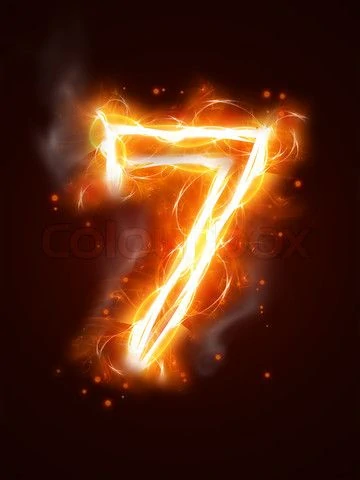

# Reading Image 

Reading the image and resizing it to our NN model size i.e. 28 * 28 and standardizing it to float array

Showing resized 28 * 28 image in plot below

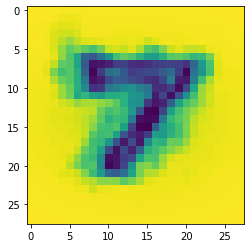

In [ ]:
# Reading the image and resizing it to our NN model size i.e. 28 * 28 and standardizing it to float array
from numpy.core.fromnumeric import squeeze
path = "https://static.wikia.nocookie.net/smpearth/images/0/06/Fiery_seven.jpg/revision/latest?cb=20200121090916"
r= requests.get(path)
with BytesIO(r.content) as f:
  img = Image.open(f).convert(mode="L")
  img = img.resize((28,28))
  test_img = np.array(img)
  test_img = test_img.astype('float32') / 255
  x = (255 - np.expand_dims(np.array(test_img), -1))/255

plt.imshow(x.squeeze(-1))

Showing resized 28 * 28 image in plot below in gray cmap

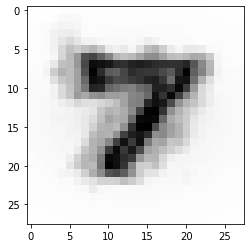

In [ ]:
plt.imshow(x.squeeze(-1), cmap='gray')

## Predicting Custom Image

In [ ]:
img_array = keras.preprocessing.image.img_to_array(x.squeeze(-1))
pred_img = model.predict(np.expand_dims(img_array, axis=0)/255)

In [ ]:
y_true = [7]
y_pred = [np.argmax(i) for i in pred_img]

print('Predicted: ', y_pred)
print('True: ',y_true)

Predicted:  [7]
True:  [7]


## Confusion Metrix

As we can see below, for 7-7 diagonal we see correct count of 1 and accuracy score is 1 i.e. 100%

which means our model has correctly classified the custom image of 7 as digit 7

In [ ]:
df =pd.DataFrame(confusion_matrix(y_true, y_pred, labels=np.arange(0,10)))
print('Accuracy : ',accuracy_score(y_true,y_pred))
df

Accuracy :  1.0


,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0
8,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0


## Conclusion

We created sequential CNN model with 2 layer and after 5 rounds of training with 64 sets of data in each step we got accuracy of 99% which is pretty good for 2 layer CNN

The accuracy of the model during training reached 99.38%, and the test data set reached 99.10%

At each iteration the accuracy was increasing and loss was seen to be reduced marginally

## References


1. https://www.kaggle.com/code/sheshngupta/tminst-character-recognition-94-4-accuracy

2. https://www.kaggle.com/code/huchunjun/99-1-tmnist-typefacemnist-chunjunhu


#License

MIT License

Copyright (c) 2022 Sanket Sanap

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.